## Student Performance Indicator
### Life cycle of Machine learning Project

- Understanding the problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data Analysis
- Data Pre-processing
- Model Training
- Choose Best Model

## 1) Problem Statement
- This project understands how the student's performance (test scores) is affected by other variable such as Gender , Ethnicity , Parental level of Education , lunch , and test  prepration course

## 2) Data Collection
- Data Source - Kaggle data Set
- The Data Consist of 8 column and 1000 rows

### 2.1) Import Data and Required Packages


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 3.1) Data Checks to perform

In [5]:
#Checking missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### No missing values found

In [7]:
#Duplicate Checking
df.duplicated().sum()

0

In [8]:
# No duplicate values are found

In [9]:
# to drop duplicate use
# df.drop_duplicates()

### Checking the data type

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the unique value of each column


In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check Statistics of data set

In [15]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights
- From above description of numerical data ,all means are very close to each other - between 66 and 68.05
- All standard deviations are also close between 14.6 and 15.9
- While there is a minimum score 0 for math is much higher = 10 and for reading score 17

In [16]:
### Exploring Data

In [17]:
print("Categories in gender variable : ",df['gender'].unique())
print("Categories in race_ethnicity variable : ",df['race_ethnicity'].unique())
print("Categories in parental_level_of_education variable : ",df['parental_level_of_education'].unique())
print("Categories in lunch variable : ",df['lunch'].unique())
print("Categories in test_preparation_course variable : ",df['test_preparation_course'].unique())

Categories in gender variable :  ['female' 'male']
Categories in race_ethnicity variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable :  ['standard' 'free/reduced']
Categories in test_preparation_course variable :  ['none' 'completed']


In [18]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categoical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print("We have {} numerical features : {}".format(len(numeric_features) , numeric_features))
print("We have {} categocal features : {}".format(len(categoical_features) , categoical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categocal features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [19]:
# Adding columns for "Total Score" and "Average"

df['total score'] = df["math_score"] + df["reading_score"] + df["writing_score"]

df["average"] = df["total score"] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f" Number of Students with full marks in maths :{math_full}")
print(f" Number of Students with full marks in Writing :{writing_full}")
print(f" Number of Students with full marks in Reading :{reading_full}")



 Number of Students with full marks in maths :7
 Number of Students with full marks in Writing :14
 Number of Students with full marks in Reading :17


In [21]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()

print(f" Number of Students with full marks in maths :{reading_less_20}")
print(f" Number of Students with full marks in Writing :{writing_less_20}")
print(f" Number of Students with full marks in Reading :{math_less_20}")


 Number of Students with full marks in maths :1
 Number of Students with full marks in Writing :3
 Number of Students with full marks in Reading :4


#### Insights
- from above , Students are performed the worsts in math
- Best performance is in reading section

### 4.Exploring Data

#### 4.1 Visualize average score distribution to make some conluclusion
- Histogram 
- Kernel Distribution Function (KDE)

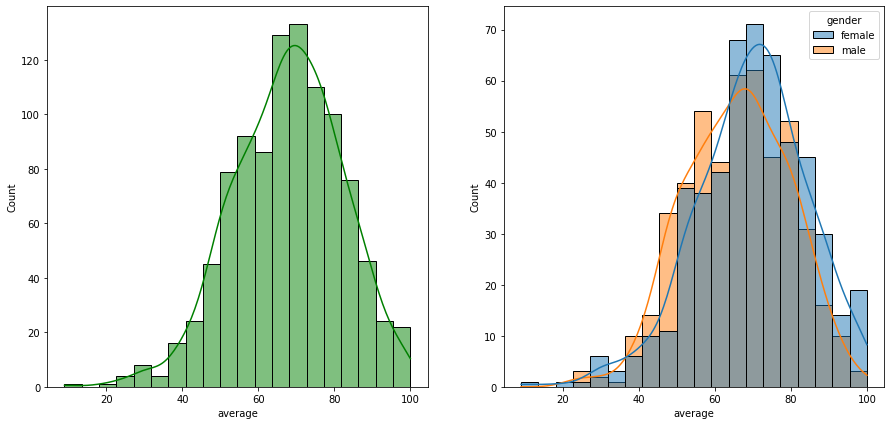

In [22]:
fig  , axs = plt.subplots(1,2 , figsize = (15 , 7))
plt.subplot(121)
sns.histplot(data =df , x = 'average' , bins = 20 , kde = True , color = 'g')
plt.subplot(122)
sns.histplot(data =df , x = 'average' , bins = 20 , kde = True , hue = 'gender')
plt.show()


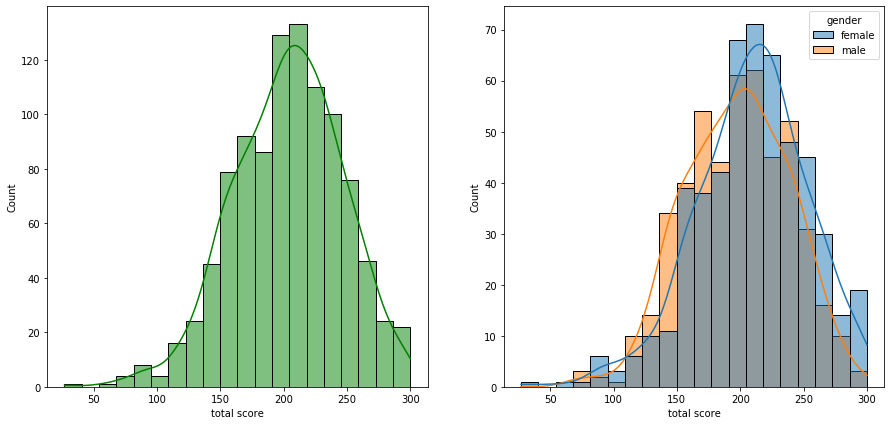

In [24]:
fig  , axs = plt.subplots(1,2 , figsize = (15 , 7))
plt.subplot(121)
sns.histplot(data =df , x = 'total score' , bins = 20 , kde = True , color = 'g')
plt.subplot(122)
sns.histplot(data =df , x = 'total score' , bins = 20 , kde = True , hue = 'gender')
plt.show()


### Insights
- Female students tend to perform well then male students.

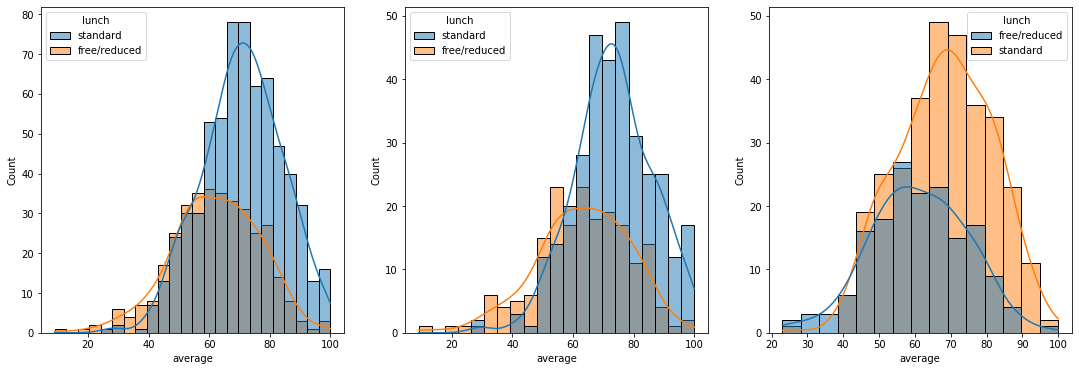

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch') 
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

### Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

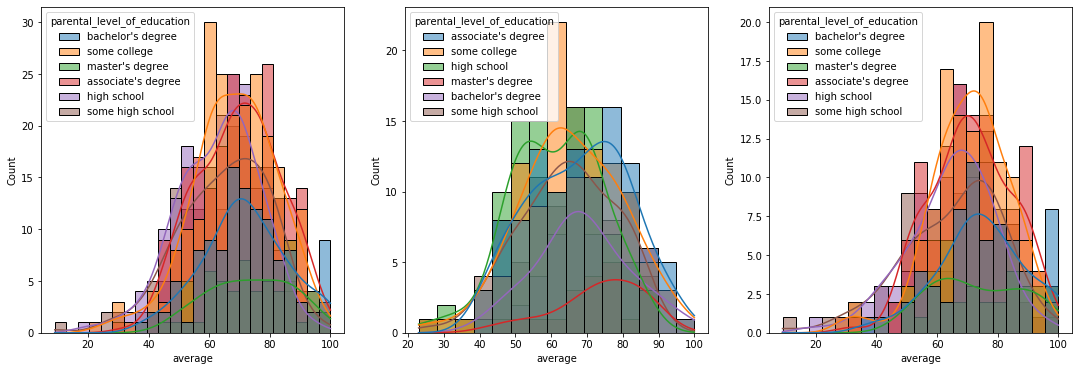

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

### Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

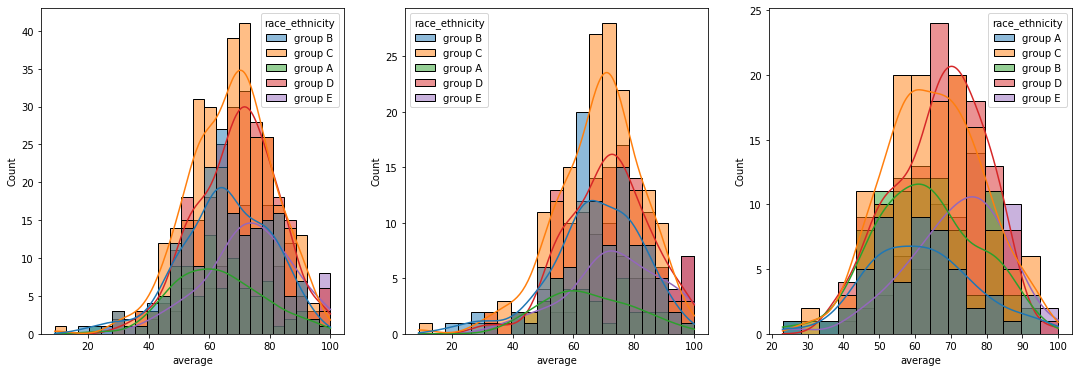

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

### 4.2 Maximumum score of students in all three subjects


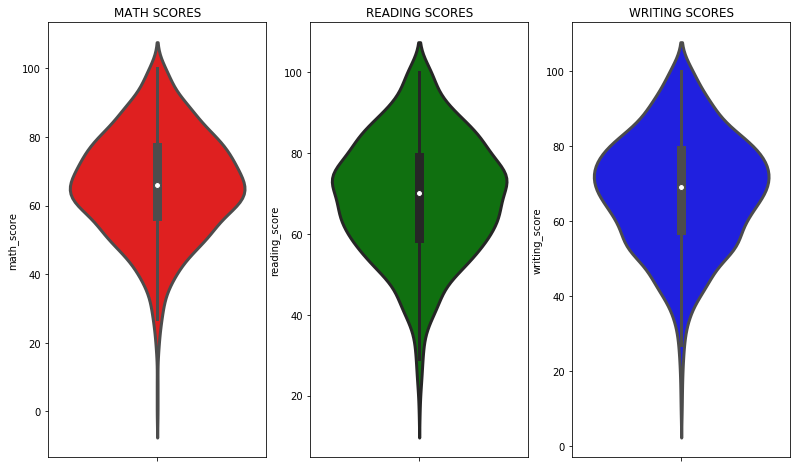

In [31]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3 Multivariate analysis using pieplot

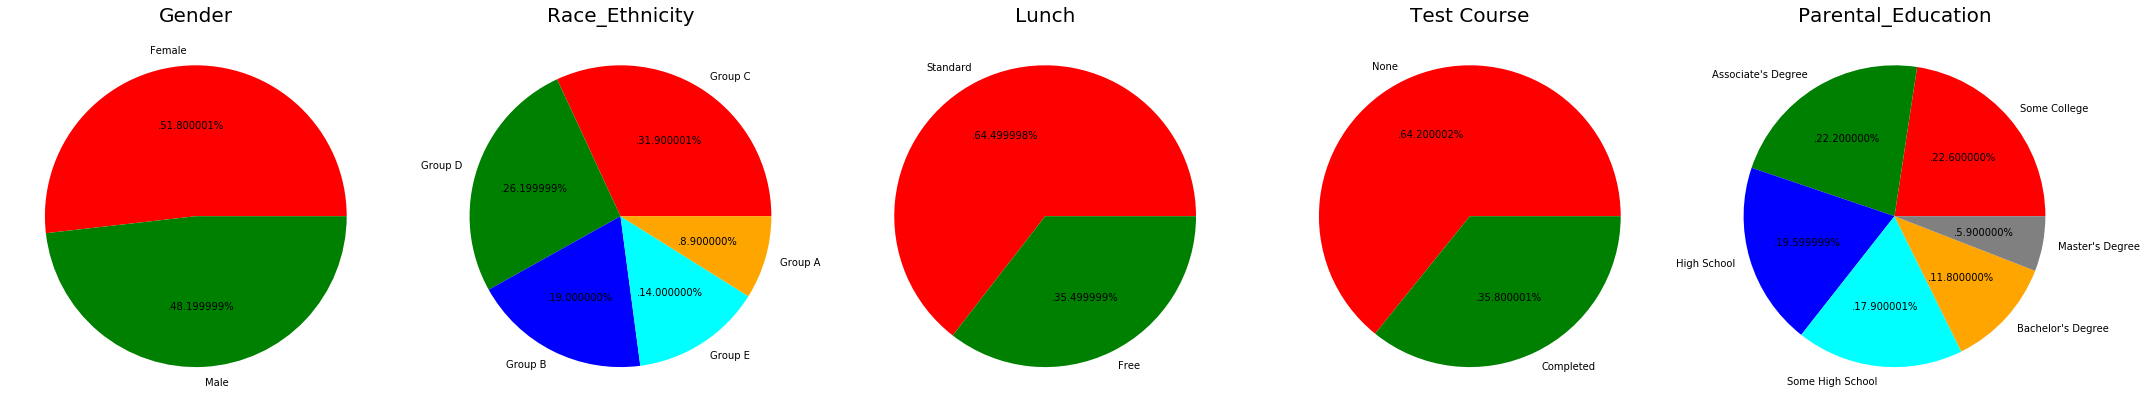

In [34]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


### Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## 4.4 Feature Wise Visualization
### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

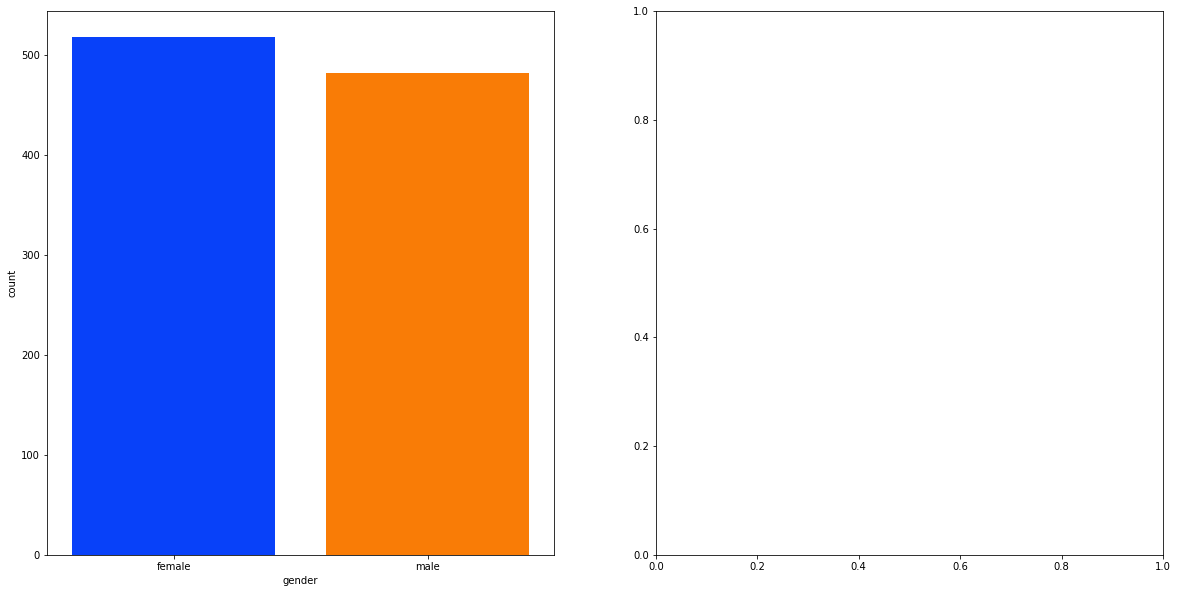

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()
